In [1]:
import pandas as pd
import numpy as np

from project.data.preprocessing import load_mcdata, handle_missing_values

from project.data.plotting import (
    plot_numerical_distribution, 
    plot_categorical_count, 
    plot_correlation_heatmap, 
    plot_reboxplot,
    plot_scatter,
    plot_single_boxplot
)

In [2]:
##load data
file_path = "../project/data/marketing_campaign.csv"
df = load_mcdata(file_path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Check for missing values
print("Missing Values Summary:")
print(df.isnull().sum())



Missing Values Summary:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [4]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.0

In [5]:
# Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [6]:
# Handle missing values using a custom function
df_cleaned = handle_missing_values(df, strategy="median")

# Verify missing values are handled
print("Missing Values After Cleaning:")
print(df_cleaned.isnull().sum())#


Handling missing values...
Filled missing values in Income using median.
Missing Values After Cleaning:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


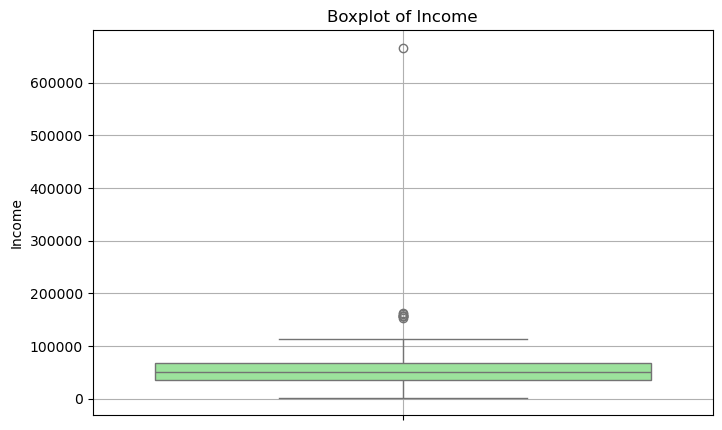

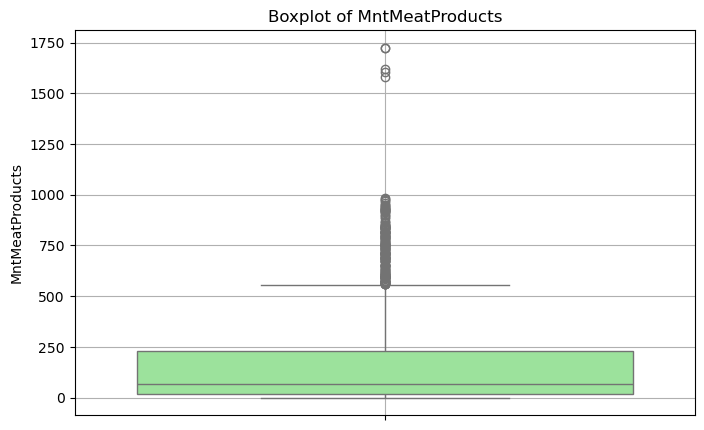

In [7]:
plot_single_boxplot(df_cleaned, "Income")
plot_single_boxplot(df_cleaned, "MntMeatProducts")

#a huge outlier has been discovered


In [8]:
df_cleaned["Income"]=df_cleaned["Income"].clip(upper=200000)
df_cleaned["MntMeatProducts"]=df_cleaned["MntMeatProducts"].clip(upper=1000)

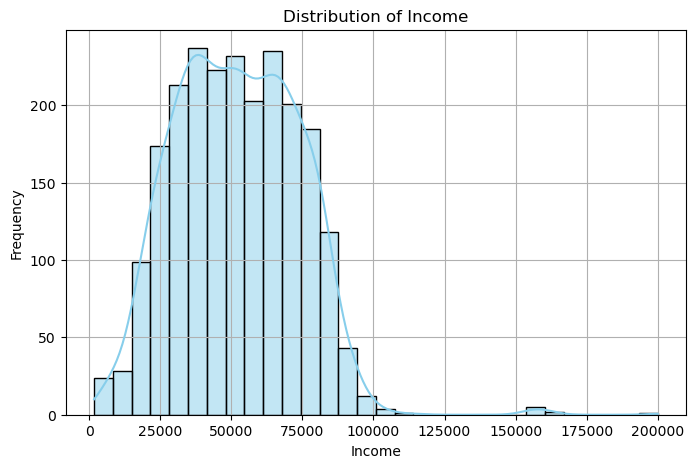

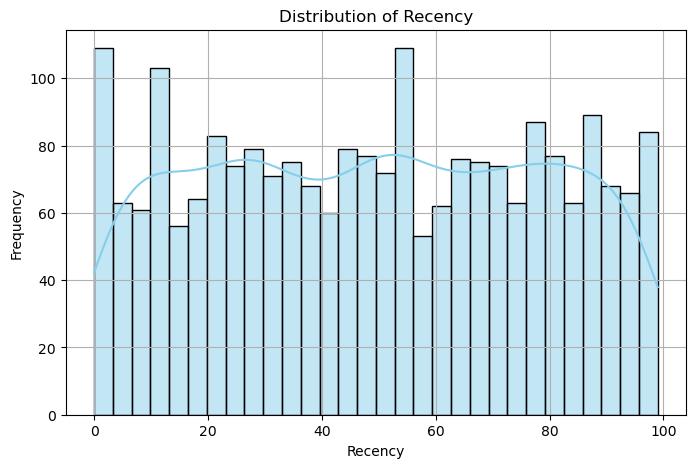

In [9]:
# Plot distributions for numerical columns
plot_numerical_distribution(df_cleaned, "Income")
plot_numerical_distribution(df_cleaned, "Recency")


In [10]:
print("Skewness of Income:", df_cleaned['Income'].skew())


Skewness of Income: 0.47333009503412654


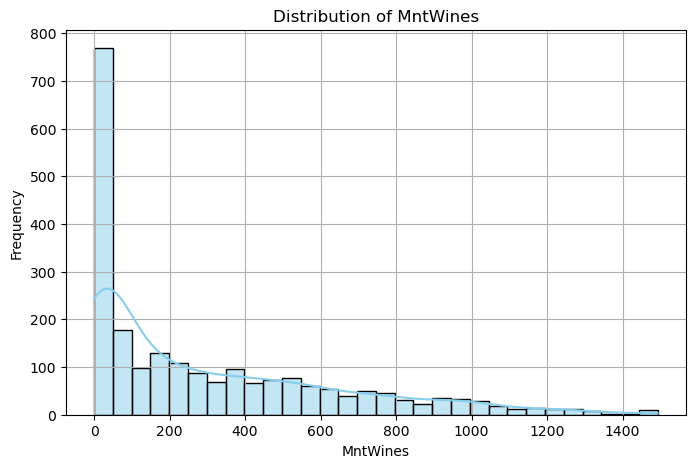

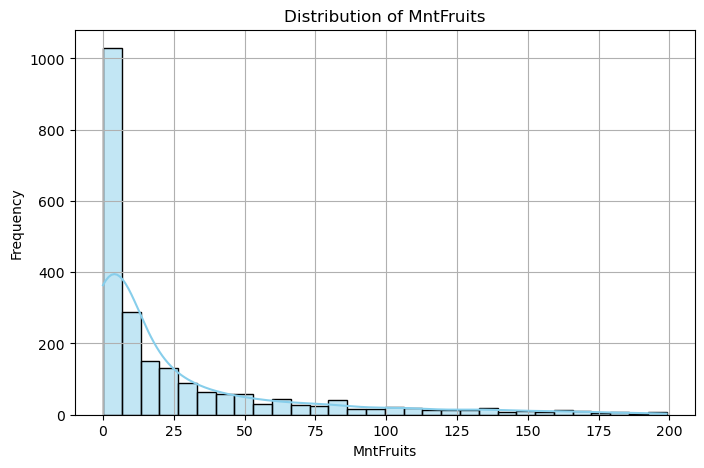

In [11]:
plot_numerical_distribution(df_cleaned, "MntWines")
plot_numerical_distribution(df_cleaned, "MntFruits")


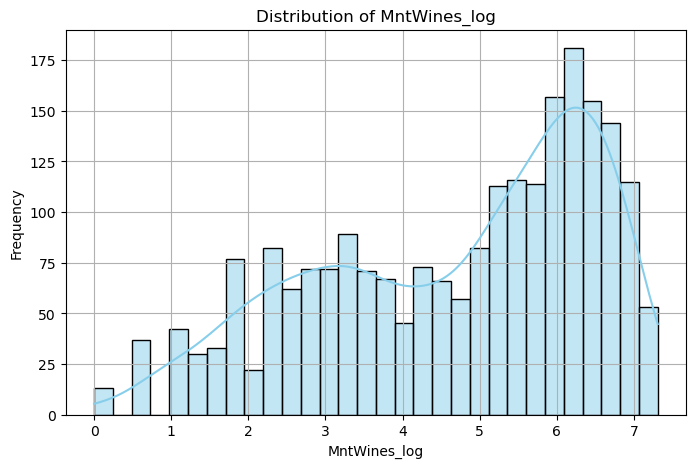

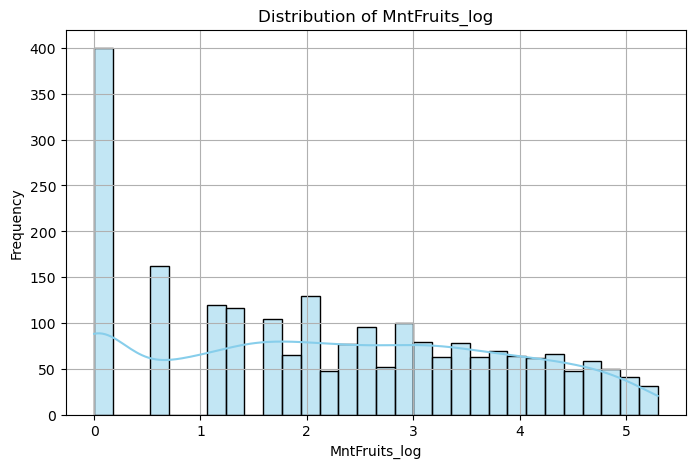

In [12]:
df_cleaned["MntWines_log"] = np.log1p(df["MntWines"])
df_cleaned["MntFruits_log"] = np.log1p(df["MntFruits"])

plot_numerical_distribution(df_cleaned, "MntWines_log")
plot_numerical_distribution(df_cleaned, "MntFruits_log")

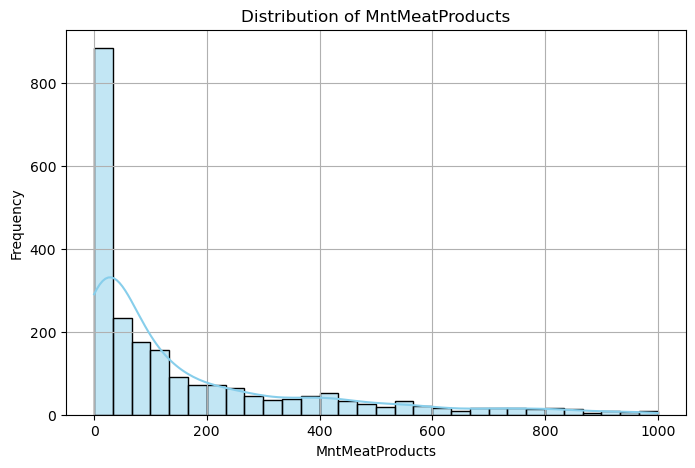

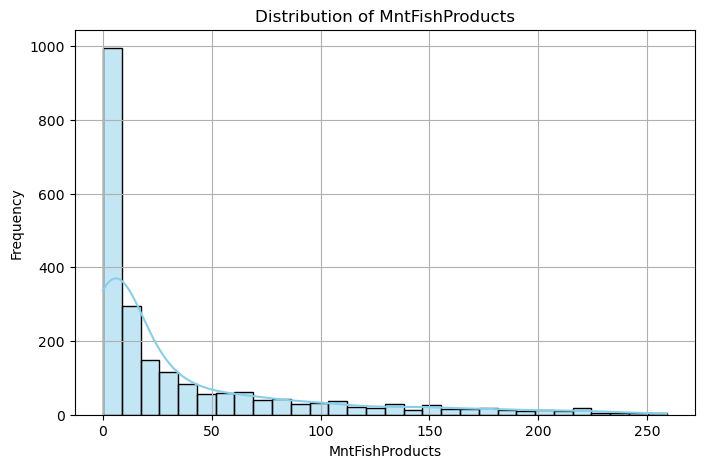

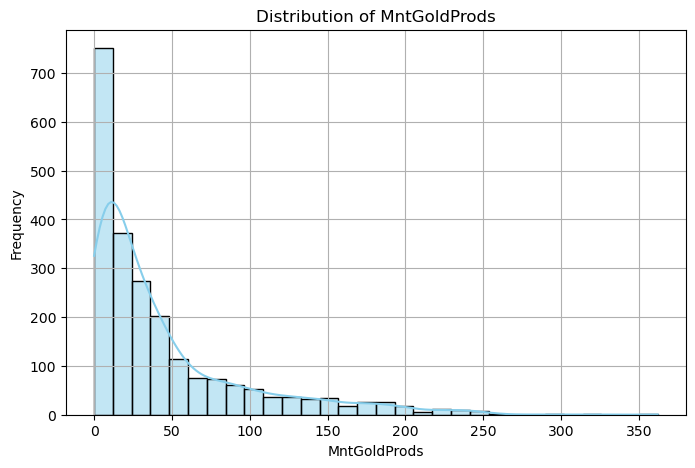

In [13]:
plot_numerical_distribution(df_cleaned,"MntMeatProducts")
plot_numerical_distribution(df_cleaned,"MntFishProducts")
plot_numerical_distribution(df_cleaned,"MntGoldProds")

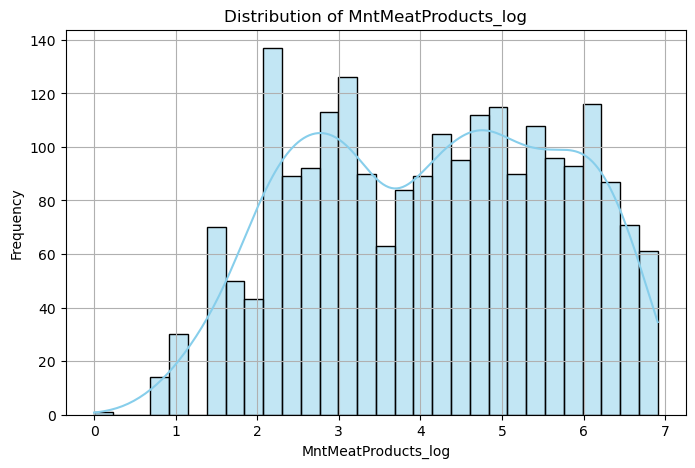

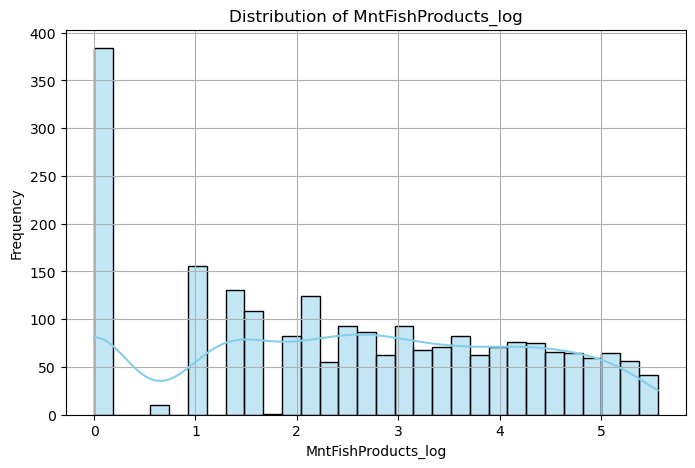

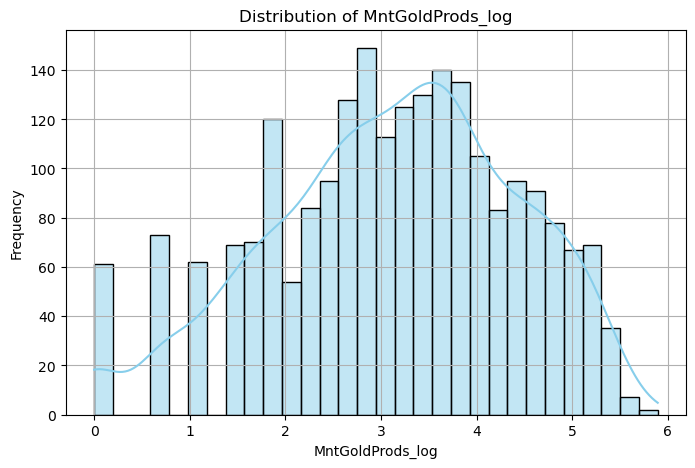

In [14]:
df_cleaned["MntMeatProducts_log"] = np.log1p(df["MntMeatProducts"])
df_cleaned["MntGoldProds_log"] = np.log1p(df["MntGoldProds"])
df_cleaned["MntFishProducts_log"] = np.log1p(df["MntFishProducts"])

plot_numerical_distribution(df_cleaned, "MntMeatProducts_log")
plot_numerical_distribution(df_cleaned, "MntFishProducts_log")
plot_numerical_distribution(df_cleaned, "MntGoldProds_log")


/Users/dontknowz/Desktop/cam/T1/D100/final_project/src/project/data/plotting.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette="muted")


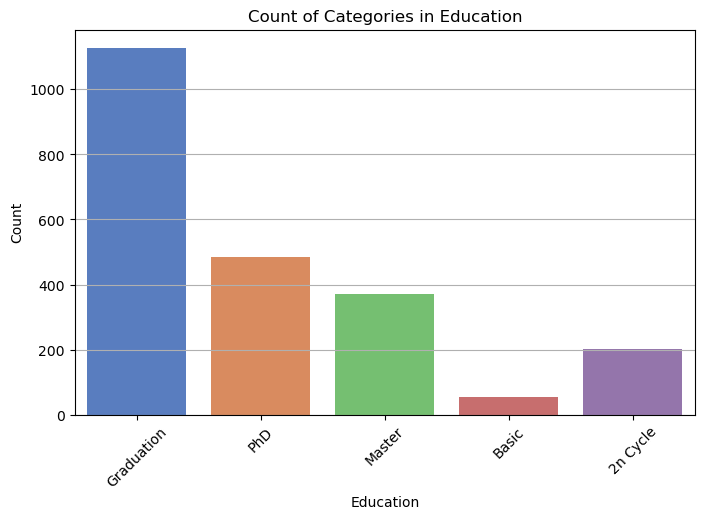

/Users/dontknowz/Desktop/cam/T1/D100/final_project/src/project/data/plotting.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette="muted")


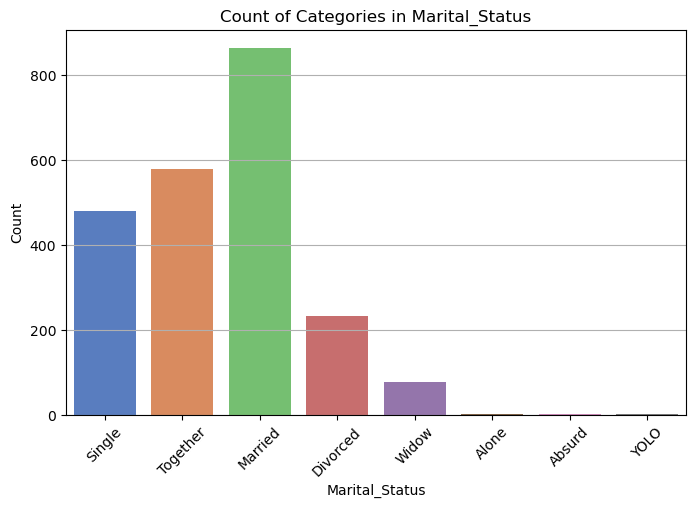

In [15]:
plot_categorical_count(df_cleaned, "Education")
plot_categorical_count(df_cleaned, "Marital_Status")

In [16]:
#we can see "alone", "absurd" and "yolo" seem to have relatively small amount, and the definition of these are not clear,
#we transform them into single
df_cleaned['Marital_Status'] = df['Marital_Status'].replace(
        ['Alone', 'Absurd', 'YOLO'], 'Single'
    )

/Users/dontknowz/Desktop/cam/T1/D100/final_project/src/project/data/plotting.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette="muted")


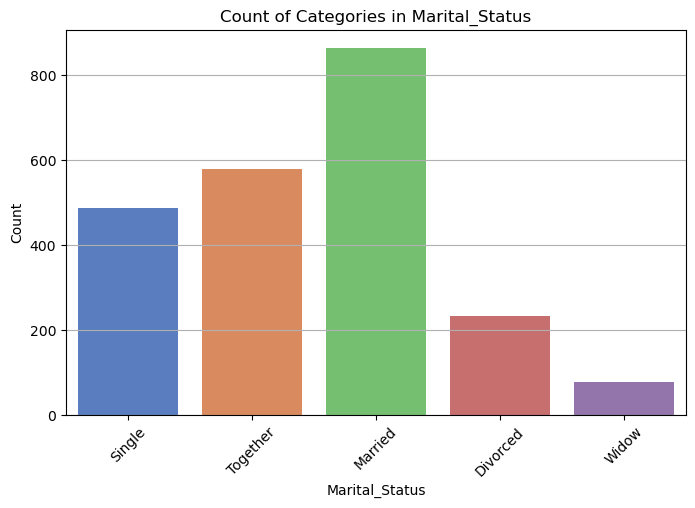

In [17]:
plot_categorical_count(df_cleaned, "Marital_Status")

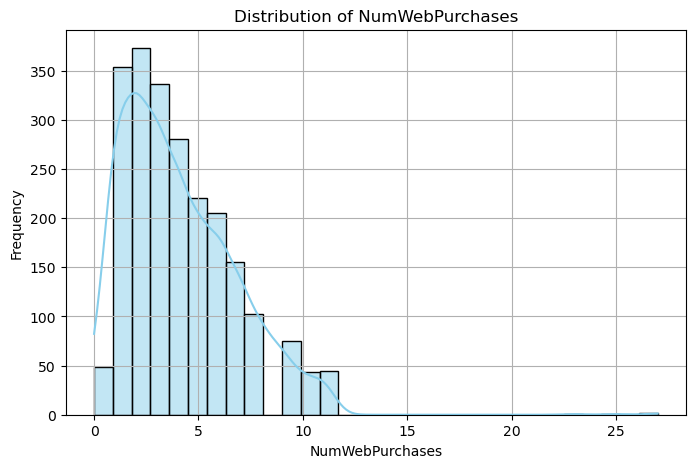

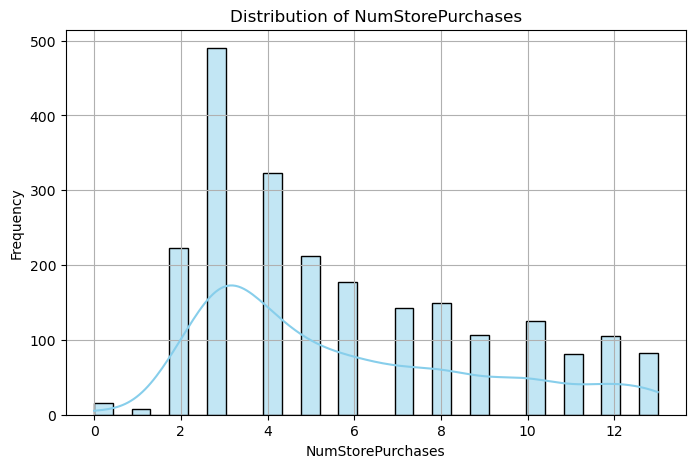

In [18]:
plot_numerical_distribution(df_cleaned, "NumWebPurchases")
plot_numerical_distribution(df_cleaned, "NumStorePurchases")

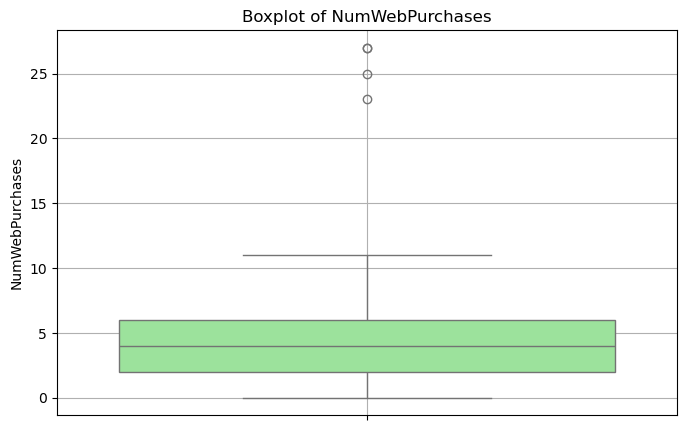

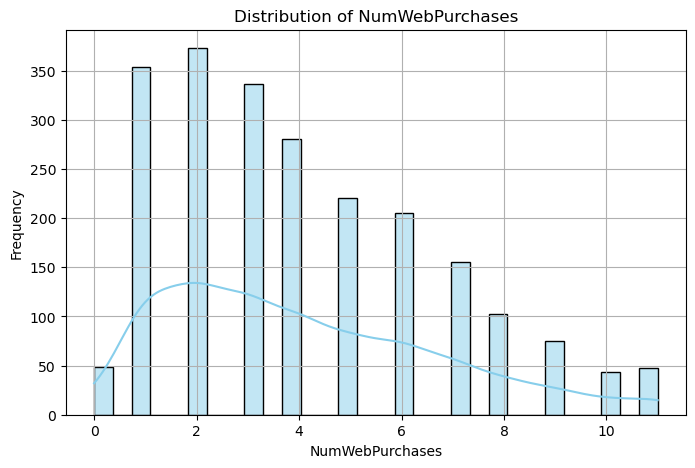

In [19]:
plot_single_boxplot(df_cleaned,"NumWebPurchases")
#some outliers have been found, we can clip them to 11
df_cleaned["NumWebPurchases"]=df_cleaned["NumWebPurchases"].clip(upper=11)
plot_numerical_distribution(df_cleaned, "NumWebPurchases")

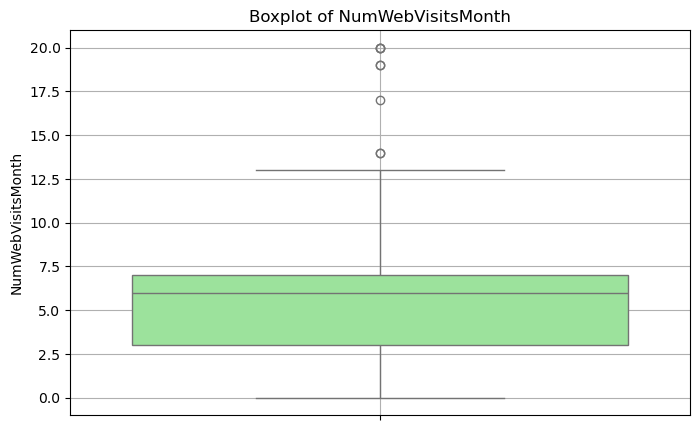

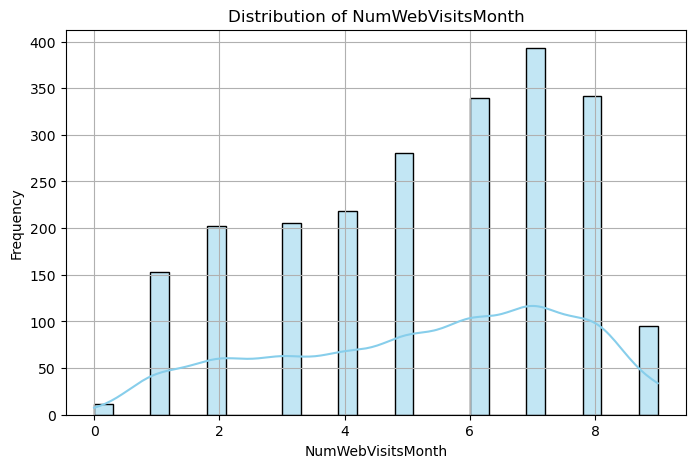

In [20]:
plot_single_boxplot(df_cleaned,"NumWebVisitsMonth")
#some outliers have been found, we can clip them to 11
df_cleaned["NumWebVisitsMonth"]=df_cleaned["NumWebVisitsMonth"].clip(upper=9)
plot_numerical_distribution(df_cleaned, "NumWebVisitsMonth")

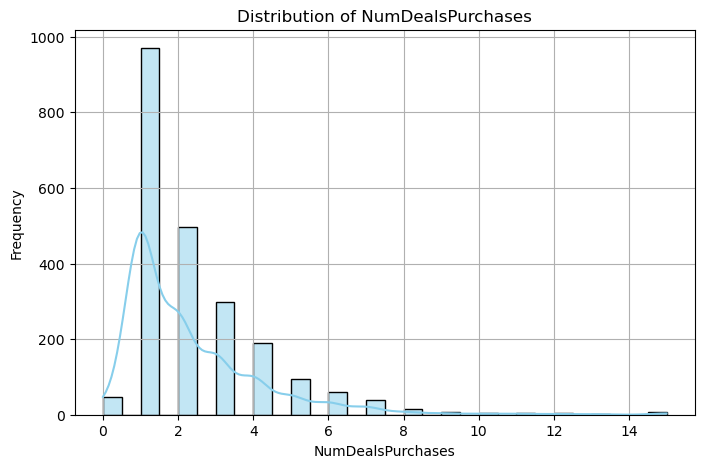

In [21]:
plot_numerical_distribution(df_cleaned, 'NumDealsPurchases')
df_cleaned['NumDealsPurchases']=df_cleaned['NumDealsPurchases'].clip(upper=8)



In [22]:
#the meaning of 'Dt_Customer: Date of customer's enrollment with the company' is weaker than Recency: Number of days since customer's last purchase,
#so we delete this variable
df_cleaned.drop(columns=["Dt_Customer"],inplace=True)
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntWines_log,MntFruits_log,MntMeatProducts_log,MntGoldProds_log,MntFishProducts_log
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,3,11,1,6.455199,4.488636,6.304449,4.488636,5.153292
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,3,11,0,2.484907,0.693147,1.945910,1.945910,1.098612
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,3,11,0,6.056784,3.912023,4.852030,3.761200,4.718499
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,3,11,0,2.484907,1.609438,3.044522,1.791759,2.397895
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,3,11,0,5.159055,3.784190,4.779123,2.772589,3.850148


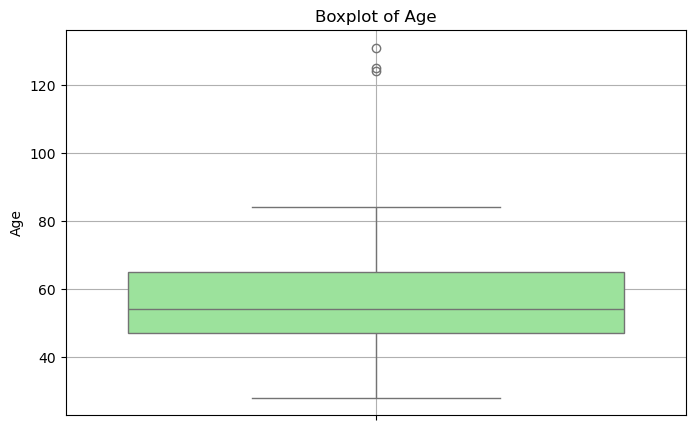

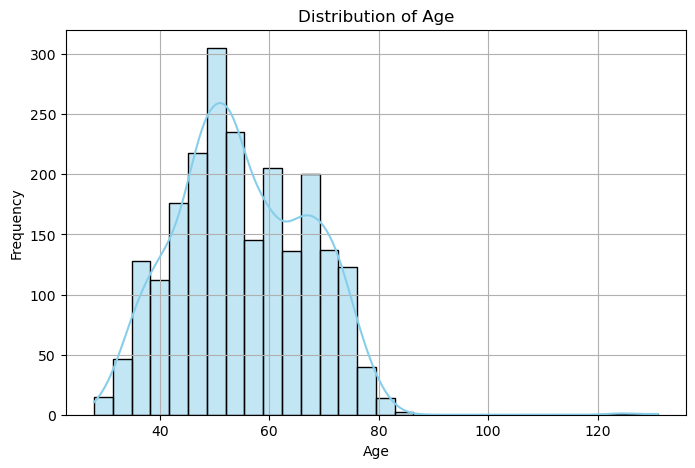

In [23]:
#for convenience, we can change "Year_Birth" into age
df_cleaned["Age"]=2024-df_cleaned["Year_Birth"]
plot_single_boxplot(df_cleaned,"Age")
plot_numerical_distribution(df_cleaned, "Age")

In [24]:
#we can use bining in variable "Age", we can bin them in 6 groups
df_cleaned["Age"] = np.digitize(df_cleaned["Age"], bins=[31, 41, 51, 61,71])

In [25]:
#for having kids and teenagers, we can aggregate them as one variable
df_cleaned["Children"]=df_cleaned["Kidhome"]+df_cleaned["Teenhome"]
print(df_cleaned["Children"].head())


0    0
1    2
2    0
3    1
4    1
Name: Children, dtype: int64


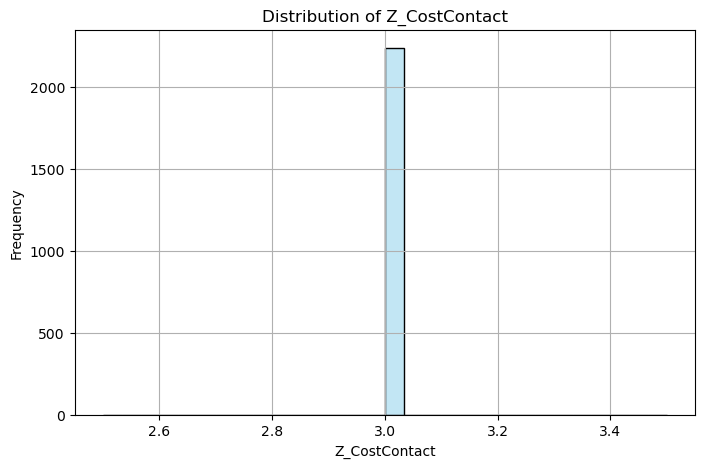

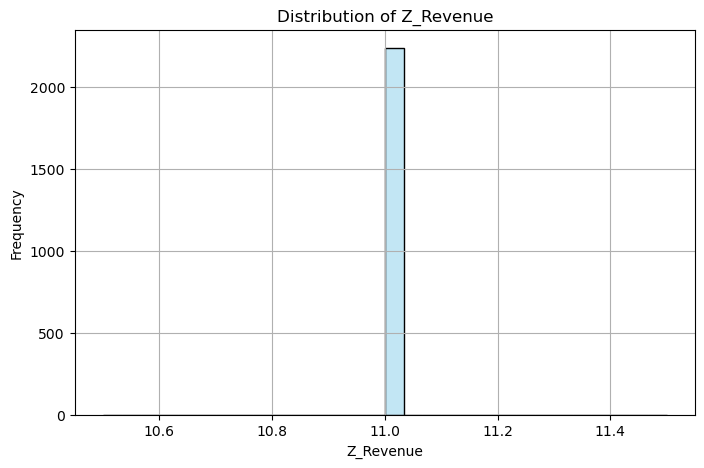

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,MntWines_log,MntFruits_log,MntMeatProducts_log,MntGoldProds_log,MntFishProducts_log,Age,Children
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,1,6.455199,4.488636,6.304449,4.488636,5.153292,4,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,2.484907,0.693147,1.945910,1.945910,1.098612,4,2
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,6.056784,3.912023,4.852030,3.761200,4.718499,3,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,2.484907,1.609438,3.044522,1.791759,2.397895,1,1
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,5.159055,3.784190,4.779123,2.772589,3.850148,2,1


In [26]:
plot_numerical_distribution(df_cleaned,"Z_CostContact")
plot_numerical_distribution(df_cleaned,"Z_Revenue")
#the dataset contains these two single-valued variables which has no contribution on the dependent variable, thus we need to delete them
df_cleaned.drop(columns=["Z_CostContact","Z_Revenue"],inplace=True)
df_cleaned.head()

In [27]:
df_cleaned.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'MntWines_log', 'MntFruits_log',
       'MntMeatProducts_log', 'MntGoldProds_log', 'MntFishProducts_log', 'Age',
       'Children'],
      dtype='object')

In [28]:
df_cleaned.to_parquet("../project/data/marketing_campaign_cleaned.parquet", engine="pyarrow", index=False)


In [29]:
df_loaded = pd.read_parquet("../project/data/marketing_campaign_cleaned.parquet", engine="pyarrow")
df_loaded.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'MntWines_log', 'MntFruits_log',
       'MntMeatProducts_log', 'MntGoldProds_log', 'MntFishProducts_log', 'Age',
       'Children'],
      dtype='object')